**This will be a step-by-step construction of the particle deposition fraction density in humans following inhalation of spherical particles for a wide range of particle radii.**

In [0]:
#%reset
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
import pandas as pd

**Anatomy** \\
The anatomy is from data obtained by Weibel (1963).

Loading anatomy from file

In [0]:
rawlink = "https://raw.githubusercontent.com/ADSRichards/Inhalation_Pharmacokinetics/master/Data/Anatomy/lung_weibel.csv";
data_A = pd.read_csv(rawlink)
data_A.head(5)

Ng = len(data_A) # number of generations 

Setting constants of anatomy

(0, 24)

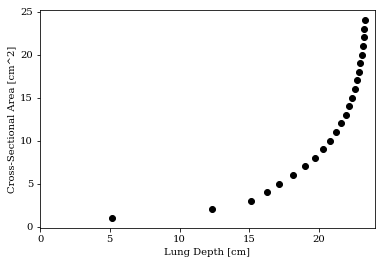

In [110]:
g_i = []; L_i = [];
D_i = []; N_i = [];
ph_i= []; th_i= [];

for i in range(0,Ng):
    g_i.append(data_A.Generation[i]) # generation number [unitless]
    L_i.append(data_A.AvLength[i]) # average length of an airway [m]
    D_i.append(data_A.AvDiameter[i]) # average diameter of an airway [m]
    N_i.append(data_A.NumberOf[i]) # number of airways of a generation [unitless]
    ph_i.append(data_A.GravityAngle[i]) # angle between two airways at gen n+1 which have branched from gen n. [unitless]
    th_i.append(data_A.BranchingAngle[i]) # [unitless]

A_i = [] # Cross-sectional area [m^2]
V_i = [] # Volume of generation [m^3]
x_i = [L_i[0]/2] # midway position at each generation [m]

for i in range(0,len(data_A)):
    A_i.append(np.pi*D_i[i]*D_i[i]/4)
    V_i.append(A_i[i]/100*L_i[i]/100)
    if i > 0:
        x_i.append(x_i[i-1] + (L_i[i-1] + L_i[i])/2)
    
plt.plot(x_i, g_i, "ok")
plt.xlabel('Lung Depth [cm]')
plt.ylabel('Cross-Sectional Area [cm^2]')

plt.xlim(0,24)


**Breathing Parameters** \\
The deposition fraction depends mainly on the speed of airflow entering the trachea.

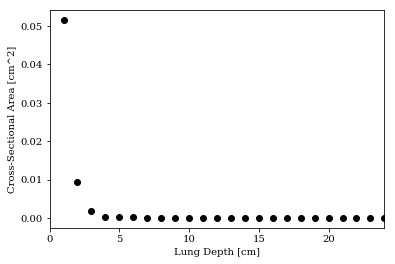

In [112]:
BF = 15 # Breathing frequency
VT = 1000 # Tidal volume

t_in = 0.5*BF
Q_in = VT/t_in/60

Q_i = [] # Generational flow rate
u_i = [] # Volumetric flow rate
t_i = [] # Residence time

for i in range(0,Ng):
    Q_i.append(Q_in/N_i[i])
    u_i.append(Q_i[i]/A_i[i]/100)
    t_i.append(V_i[i]/N_i[i]/Q_i[i]*60)
    
plt.plot(g_i, t_i, "ok");
plt.xlabel('Lung Depth [cm]');
plt.ylabel('Cross-Sectional Area [cm^2]');

plt.xlim(0,24);

Setting grid of possible particle diameters which may be inhaled

In [83]:
Nd = 400
dmin = 1.5e-9
dmax = 2.0e-4
d = np.logspace(np.log10(dmin),np.log10(dmax),Nd) # PARTICLE diameter grid [m]

400


Building parameters for deposition

In [0]:
# drug specific 
po = 1000 # uniform mass density of a spherical particle [kg/m^3]

# thermodynamics
kB = 1.38e-23 # Boltzmann's constant [(kg m^2/s^2)/K]
kT = kB*(273.15 + 37.5) # Body temp in units of energy [kg m^2/s^2]
eta = 1.922e-5 # viscosity of air at body temp [kg s/m]
pa = 1.1372 # density of air at body temp [kg/m^3]
ell = 0.066e-6 # mean free path of air molecules at body temp [m]

# Cunningham slip correction factor (for impaction and sedimentation)
Cd = [] # [unitless]
for di in range(0,Nd):
    Cd.append( 1 + ell/d[di]*(2.514 + 0.8)*np.exp(-pow(0.55,d[di]/ell)) )
    
    
# gravity specific
g = 9.81 # gravitational acceleration [m/s^2]
vg = [] # gravitational settling velocity [m/s]
for di in range(0,Nd):
    vg.append( Cd[di]*(po*d[di]*d[di]*g/(18*eta)) )
    
eps = [] # epsilon [unitless]
for gi in range(0,Ng):
    epsi = []
    for di in range(0,Nd):
        epsi.append( 3*vg[di]*t_i[gi]*np.cos(ph_i[gi])/(4*D_i[gi]) )
    eps.append(stki)

    
# impaction specific
stk = [] # Stokes number [unitless]
for gi in range(0,Ng):
    stki = []
    for di in range(0,Nd):
        stki.append( Cd[di]*(po*d[di]*d[di]*u_i[gi]/(9*eta*D_i[gi])) )
    stk.append(stki)

    
# diffusion specific
Dmol = [] # diffusion coefficient [m^2/s]
for di in range(0,Nd):
    Dmol.append( kT*Cd[di]/(3*math.pi*eta*d[di]) )

Re = [] # Reynolds number [unitless]
sig = [] # sigma 
for gi in range(0,Ng):
    Re.append()
    sigi = []
    for di in range(0,Nd):
        sig.append( Dmol[di]*L_i[gi]/pow(u_i[gi]*D_i[gi], 2) )